# MACHINE LEARNING PROJECT


# Forest Cover Type Prediction

## Source : https://www.kaggle.com/c/forest-cover-type-prediction/data



## Data Overview :
The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado which are as follows:   
1 - Rawah Wilderness Area  
2 - Neota Wilderness Area  
3 - Comanche Peak Wilderness Area  
4 - Cache la Poudre Wilderness Area  

Our goal is to predict the forest cover type. The seven types of forest cover are :    
1 - Spruce/Fir  
2 - Lodgepole Pine  
3 - Ponderosa Pine  
4 - Cottonwood/Willow  
5 - Aspen  
6 - Douglas-fir  
7 - Krummholz  

- This is a classification problem where the target could belong to any of the seven classes.



## Data Fields:

Elevation - Elevation in meters  
Aspect - Aspect in degrees azimuth  
Slope - Slope in degrees  
Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features  
Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features  
Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway  
Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice  
Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice  
Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice  
Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points  
Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation  
Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation  
Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation 


## Question:  Given the other attributes, what will be the 'Cover_Type'?

### The training set (15120 observations) contains both features and the Cover_Type. The test set (565892 observations) contains only the features. 

## Assumptions:
1.  Ecology of the areas across which the data is collected is similar.
2.  Seasonal changes are constant across all the observations.   
3. The dataset is recently collected.   


## Limitations:
1.  Environmental factors affecting the growth of any cover type is not taken into consideration.    
2.  Human error while collecting data is not accounted for.    
3.  Management practices that might have affected the growth is not accounted for.    

## About the data :

In [1]:
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv("C:/Users/train.csv")

In [2]:
dataset = dataset.iloc[:,1:]
print(dataset.shape)

(15120, 55)


In [3]:
print(dataset.dtypes)

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

## Data Pre-processing

In [4]:
pd.set_option('display.max_columns', None)
print(dataset.describe())

          Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%            

- No attribute is missing as count is 15120 for all attributes. So, no deletion is required.
- Attributes Soil_Type7 and Soil_Type15 can be removed as they are constant.
- Wilderness_Area and Soil_Type are one hot encoded. Hence, they could be converted back for some analysis.
- Scales are not the same for all. Hence, rescaling and standardization may be necessary for some algorithms.
- Negative values are present in Vertical_Distance_To_Hydrology. Hence, some tests such as chi-sq cant be used.

## Descriptive Statistics

In [5]:
print(dataset.skew())

Elevation                               0.075640
Aspect                                  0.450935
Slope                                   0.523658
Horizontal_Distance_To_Hydrology        1.488052
Vertical_Distance_To_Hydrology          1.537776
Horizontal_Distance_To_Roadways         1.247811
Hillshade_9am                          -1.093681
Hillshade_Noon                         -0.953232
Hillshade_3pm                          -0.340827
Horizontal_Distance_To_Fire_Points      1.617099
Wilderness_Area1                        1.231244
Wilderness_Area2                        5.228781
Wilderness_Area3                        0.324594
Wilderness_Area4                        0.825798
Soil_Type1                              6.294716
Soil_Type2                              4.617019
Soil_Type3                              3.575995
Soil_Type4                              3.872721
Soil_Type5                              9.416209
Soil_Type6                              4.506716
Soil_Type7          

- Values close to 0 show less skew
- Several attributes in Soil_Type show a large skew. Hence, some algos may benefit if skew is corrected

In [6]:
rem = []

#Add constant columns as they don't help in prediction process
for c in dataset.columns:
    if dataset[c].std() == 0: #standard deviation is zero
        rem.append(c)

#drop the columns        
dataset.drop(rem,axis=1,inplace=True)

print(rem)

['Soil_Type7', 'Soil_Type15']


In [7]:
dataset.groupby('Cover_Type').size()
# We see that all classes have an equal presence. No class re-balancing is required.

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64

In [8]:
dataset.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563,0.330417,0.261729,0.354025,-0.783651,-0.218818,-0.147947,-0.307523,-0.125342,-0.141478,-0.187354,0.002934,-0.010571,-0.357816,-0.037906,0.017432,0.039304,-0.140619,-0.066252,-0.200663,-0.035173,0.029808,0.008548,0.032509,0.146236,0.159872,0.097647,0.010586,0.020669,0.040019,-0.001077,0.165304,0.048204,0.093191,0.172349,0.123821,0.021876,0.120157,0.040571,0.073825,0.323440,0.296405,0.306755,0.016090
Aspect,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169,-0.131262,0.028238,0.032578,0.075228,-0.024538,-0.020970,-0.069120,0.018019,0.000343,-0.006066,0.001723,-0.019391,0.111959,-0.034549,-0.044142,0.024312,0.001181,0.027121,0.029870,-0.042140,0.007570,-0.023330,0.018815,0.022301,0.041880,0.005480,-0.002340,-0.009775,0.018986,0.026330,-0.063428,-0.086897,0.008160,0.003700,0.018719,0.012927,-0.004235,0.003160,-0.046309,0.043860,-0.031342,0.007208,0.008015
Slope,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527,-0.152820,-0.065923,-0.113033,0.286985,0.099355,-0.081498,0.265541,0.087841,0.074720,-0.047868,-0.012989,-0.022220,0.255804,-0.109798,-0.115088,0.119863,-0.054085,-0.064321,-0.124375,-0.069326,-0.047742,-0.068508,-0.033935,-0.076393,-0.184528,0.017982,0.011062,-0.030700,0.012295,0.036082,-0.083108,0.118725,-0.076851,-0.147258,0.072027,-0.030590,-0.048855,-0.004570,0.003129,-0.148342,0.051900,-0.043513,0.087722
Horizontal_Distance_To_Hydrology,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817,-0.009402,0.087484,0.200532,-0.239303,-0.084766,0.024234,-0.089578,-0.059398,-0.025247,0.021203,0.002819,-0.005523,-0.112852,0.026150,0.034306,0.026595,-0.111878,-0.084804,-0.159717,-0.018282,-0.033946,-0.062873,-0.025207,-0.007840,-0.087963,0.046915,-0.004615,0.027879,0.064616,0.019663,0.033854,-0.032540,0.060886,0.138275,0.062121,0.072485,-0.015446,0.077251,-0.009549,0.131444,0.066284,0.242304,-0.010515
Vertical_Distance_To_Hydrology,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048,-0.117835,0.017108,0.069884,0.027321,-0.034309,0.005436,0.070414,-0.016543,0.018550,0.094701,-0.007049,-0.014610,0.018305,-0.029364,-0.033237,0.085309,-0.087445,-0.070201,-0.155574,-0.039745,-0.040898,-0.065710,-0.022197,-0.064122,-0.144317,0.017148,-0.011697,-0.016315,0.047304,0.046287,-0.056267,-0.000083,0.006247,0.020298,0.077167,0.028910,-0.021662,0.015680,-0.020717,-0.008989,0.058981,0.227110,0.075647
Horizontal_Distance_To_Roadways,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,0.486386,0.367786,-0.080758,0.124378,-0.440454,-0.122634,-0.092474,-0.159434,-0.094919,-0.091419,-0.135266,0.018481,-0.019055,-0.213057,-0.079474,0.076984,0.002317,-0.071706,-0.014958,-0.080802,-0.041192,0.059096,0.046444,-0.004712,0.107962,0.132568,0.022445,-0.006635,0.025094,0.027413,-0.011532,0.265508,-0.062701,0.026668,0.031538,0.045797,0.021415,0.065310,0.030282,0.063302,0.197892,0.120953,0.144786,-0.105662
Hillshade_9am,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,0.078144,0.173382,-0.012096,-0.016736,-0.137192,

In [9]:
dataset_corr = dataset.corr()

# Set the threshold to select only only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []
cols=dataset.columns 
#len(dataset)
size = len(dataset_corr)
#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (dataset_corr.iloc[i,j] >= threshold and dataset_corr.iloc[i,j] < 1) or (dataset_corr.iloc[i,j] < 0 and dataset_corr.iloc[i,j] <= -threshold):
            corr_list.append([dataset_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

Elevation and Wilderness_Area4 = -0.78
Hillshade_9am and Hillshade_3pm = -0.78
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.65
Aspect and Hillshade_3pm = 0.64
Hillshade_Noon and Hillshade_3pm = 0.61
Slope and Hillshade_Noon = -0.61
Aspect and Hillshade_9am = -0.59
Elevation and Horizontal_Distance_To_Roadways = 0.58
Wilderness_Area3 and Wilderness_Area4 = -0.57
Wilderness_Area1 and Soil_Type29 = 0.55


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Text xticklabel objects>)

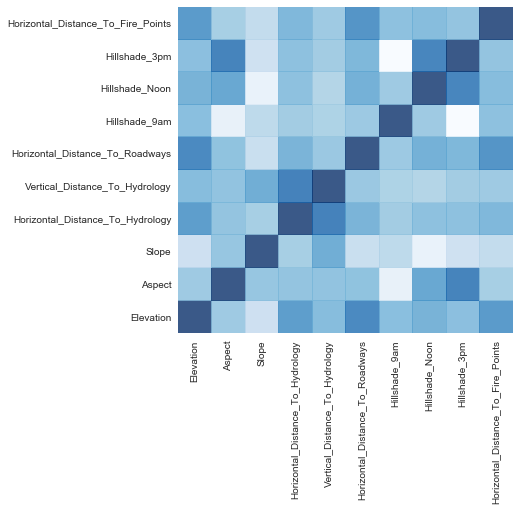

In [10]:
con = ['Elevation' , 'Aspect' , 'Slope', 'Horizontal_Distance_To_Hydrology' , 'Vertical_Distance_To_Hydrology' ,'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
con_variables = dataset[con]

#Cor = con_variables.iloc[:,0:10]
Cor_matrix = con_variables.corr(method='pearson', min_periods=1)
#print(Cor_matrxi)

fig, ax = plt.subplots()
heatmap = ax.pcolor(Cor_matrix, cmap=plt.cm.Blues, alpha=0.8)
fig = plt.gcf()
fig.set_size_inches(6, 6)
ax.set_frame_on(False)
ax.set_yticks(np.arange(10) + 0.5, minor=False)
ax.set_xticks(np.arange(10) + 0.5, minor=False)
ax.set_xticklabels(con[0:10], minor=False)
ax.set_yticklabels(con[0:10], minor=False)
plt.xticks(rotation=90)

In [11]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(dataset, columns=["Elevation"])

# Put the target  in another DataFrame
target = pd.DataFrame(dataset, columns=["Cover_Type"])

import statsmodels.api as sm

X = df["Elevation"]
y = target["Cover_Type"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
# make the predictions by the model
predictions = model.predict(X) 

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cover_Type   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 5.483e+04
Date:                Wed, 18 Apr 2018   Prob (F-statistic):               0.00
Time:                        06:27:19   Log-Likelihood:                -32521.
No. Observations:               15120   AIC:                         6.504e+04
Df Residuals:                   15119   BIC:                         6.505e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Elevation      0.0014   6.08e-06    234.165      0.000       0.001       0.001
==============================================================================
Omnibus:                     5998.494   Durbin-Watson:                   1.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1320.370
Skew:                          -0.482   Prob(JB):                    1.93e-287
Kurtosis:                       1.920   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We can see here that this model has a much higher R-squared value of  0.784, meaning that this model explains 78.4% of the variance in our dependent variable.

In [12]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(dataset, columns=["Slope"])

# Put the target  in another DataFrame
target = pd.DataFrame(dataset, columns=["Cover_Type"])

import statsmodels.api as sm

X = df["Slope"]
y = target["Cover_Type"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
# make the predictions by the model
predictions = model.predict(X) 

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cover_Type   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                 2.968e+04
Date:                Wed, 18 Apr 2018   Prob (F-statistic):               0.00
Time:                        06:27:19   Log-Likelihood:                -35891.
No. Observations:               15120   AIC:                         7.178e+04
Df Residuals:                   15119   BIC:                         7.179e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Slope          0.1963      0.001    172.269      0.000       0.194       0.199
==============================================================================
Omnibus:                      517.060   Durbin-Watson:                   1.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.416
Skew:                           0.107   Prob(JB):                     3.44e-56
Kurtosis:                       2.400   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We can see here that this model has a much higher R-squared value of  0.662.

## Data Visualization

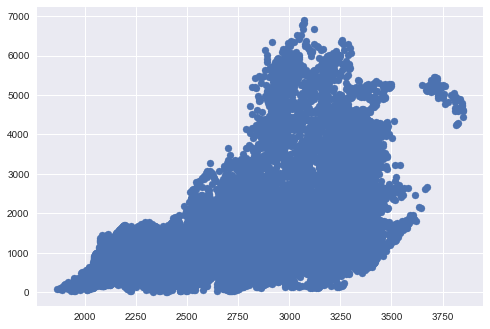

In [13]:
#Scatter Plot for Elevation and Horizontal_Distance_To_Roadways
x = dataset['Elevation']
y = dataset['Horizontal_Distance_To_Roadways']

plt.scatter(x,y)
plt.show()

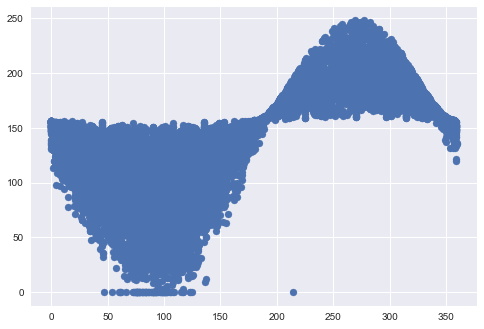

In [14]:
#Scatter Plot for Aspect vs Hillshade_3pm
x = dataset['Aspect']
y = dataset['Hillshade_3pm']

plt.scatter(x,y)
plt.show()

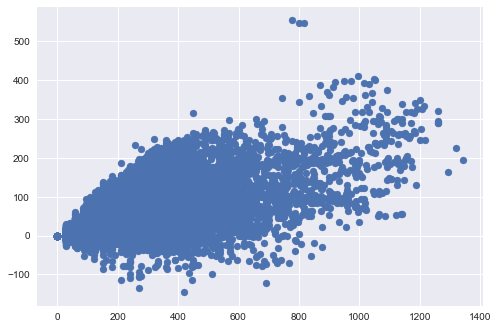

In [15]:
#Scatter Plot for Horizontal_Distance_To_Hydrology vs the Vertical Distance
x = dataset['Horizontal_Distance_To_Hydrology']
y = dataset['Vertical_Distance_To_Hydrology']

plt.scatter(x,y)
plt.show()

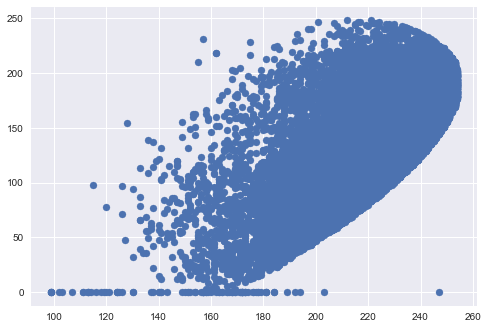

In [16]:
#ScatterPlot for Hillshade_Noon vs Hillshade_3pm
x = dataset['Hillshade_Noon']
y = dataset['Hillshade_3pm']

plt.scatter(x,y)
plt.show()

In [17]:
cols = dataset.columns
size = len(cols)-1
x = cols[size]
y = cols[0:size]

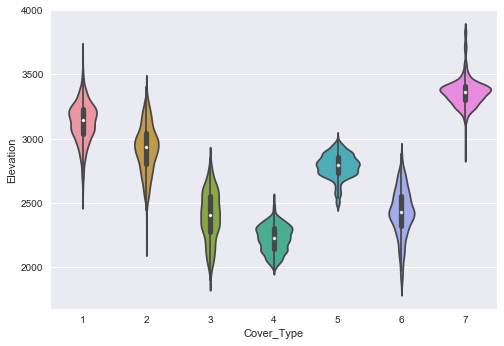

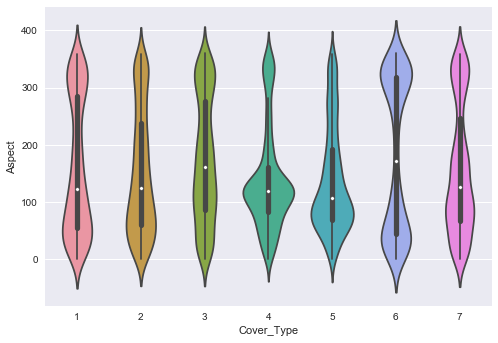

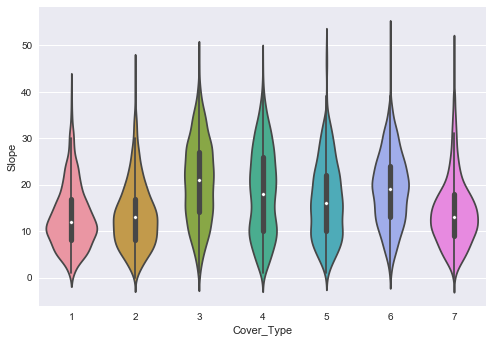

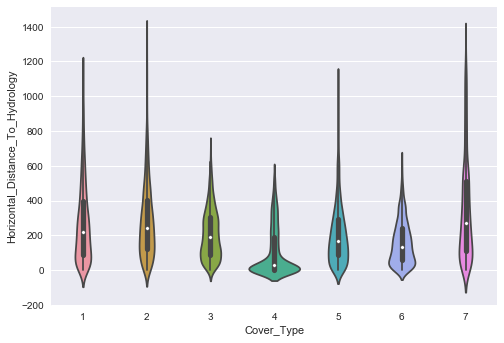

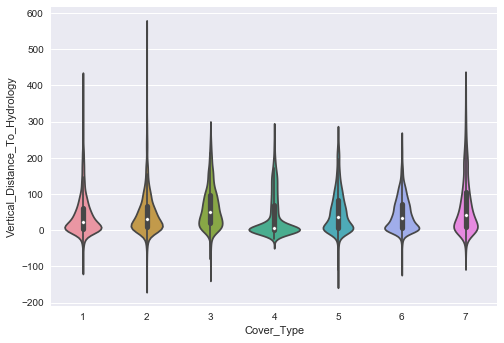

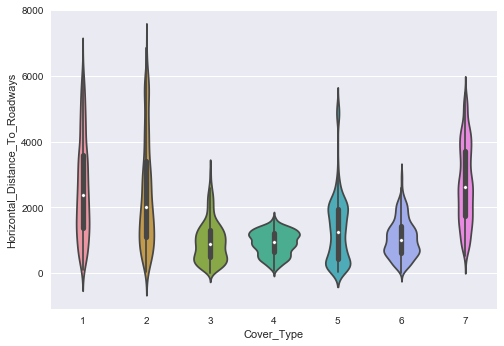

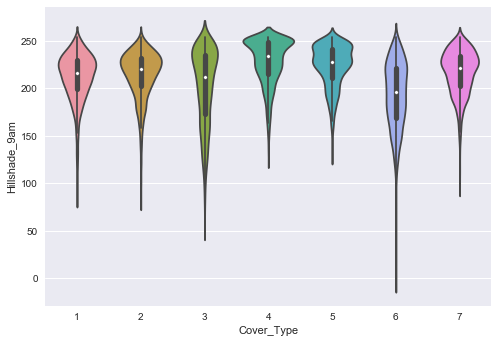

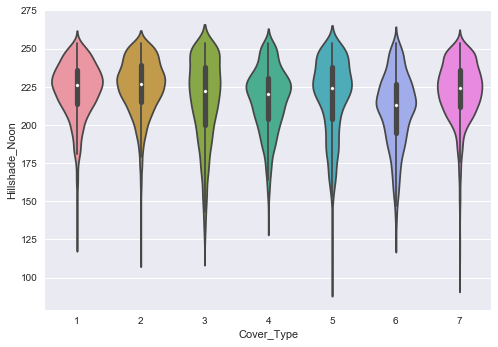

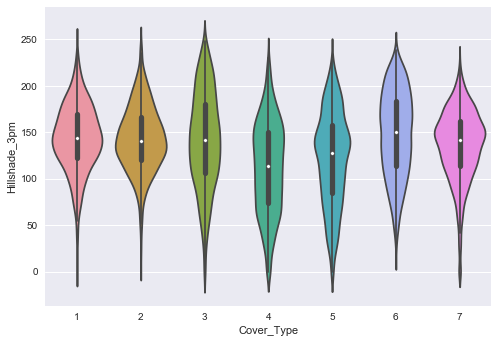

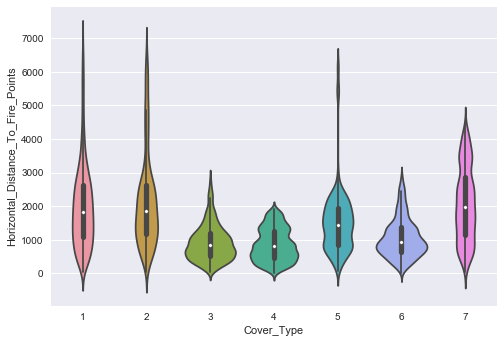

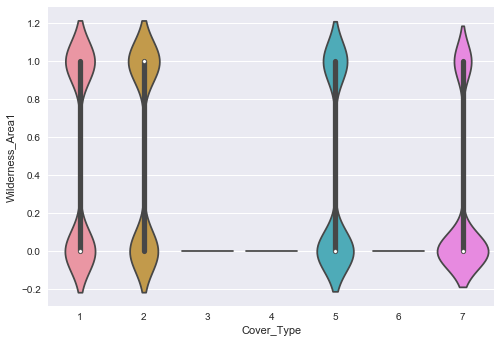

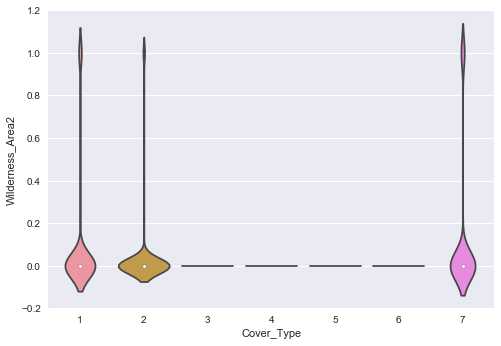

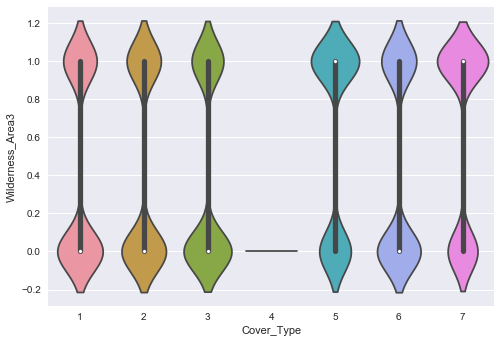

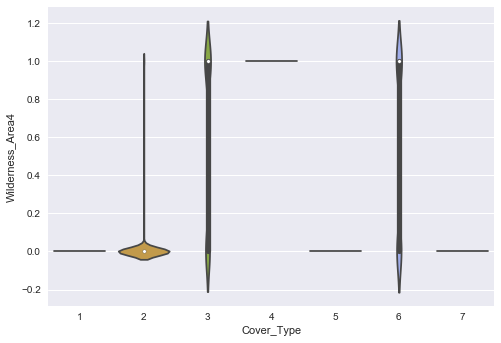

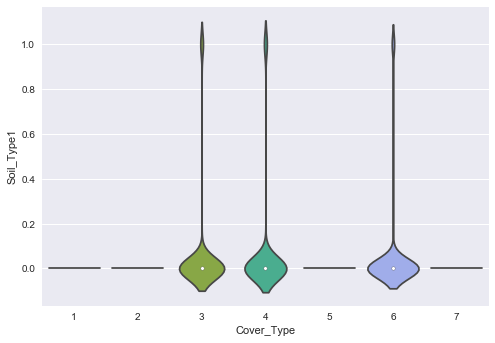

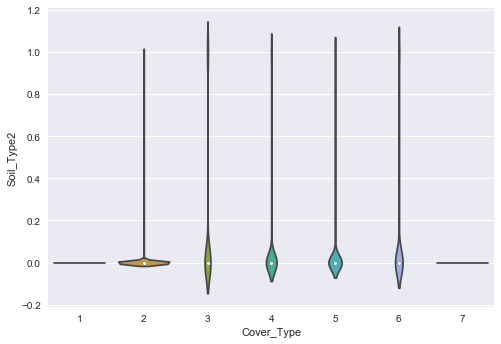

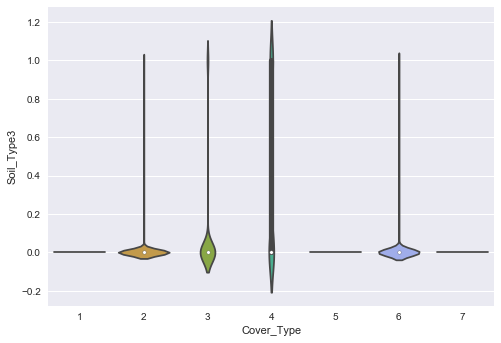

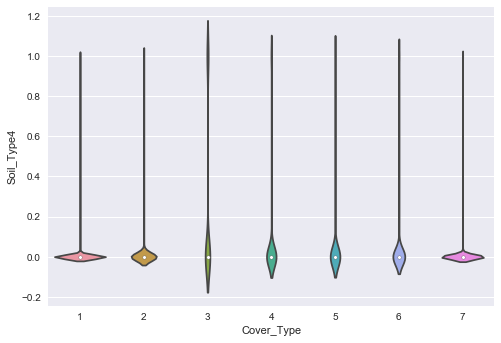

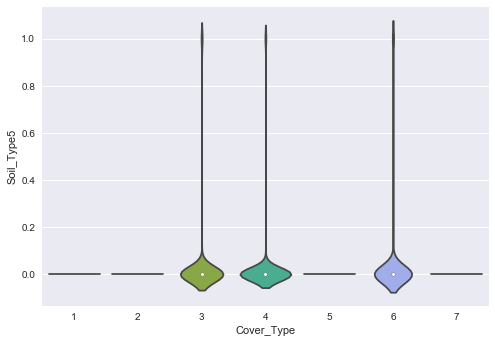

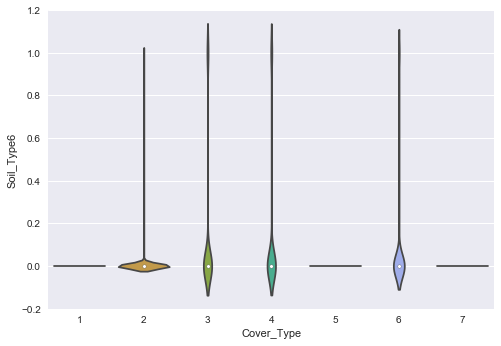

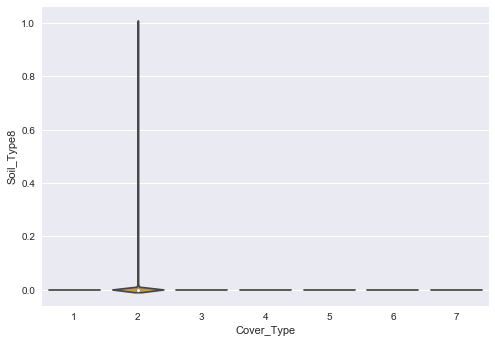

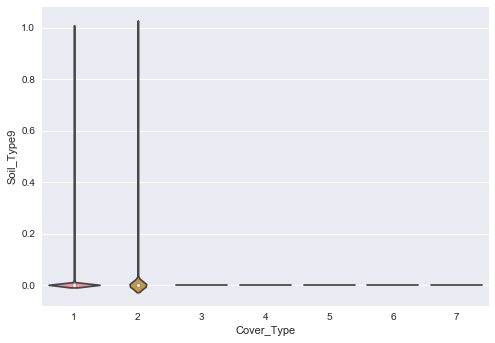

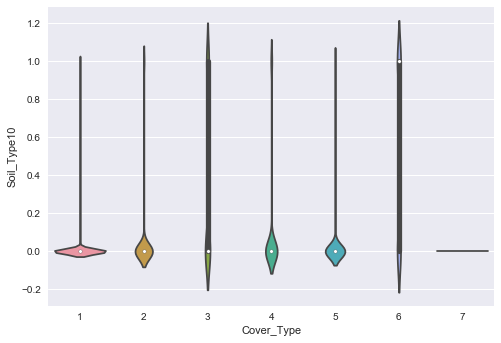

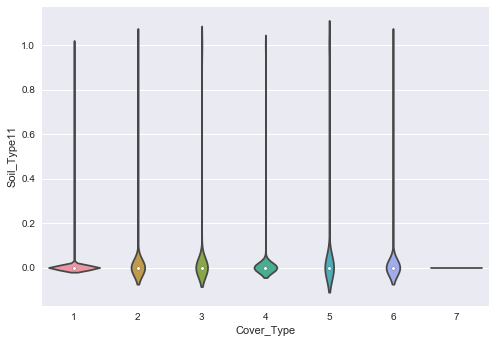

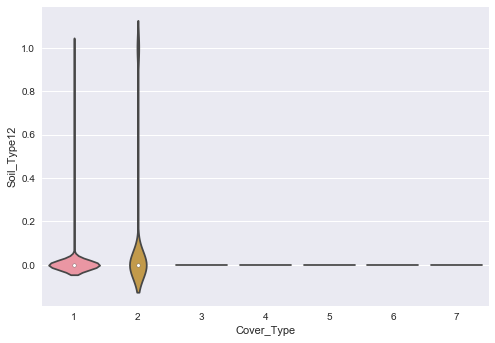

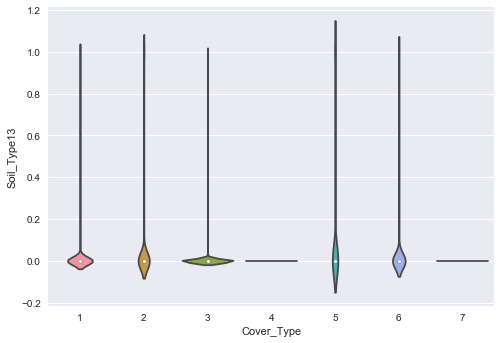

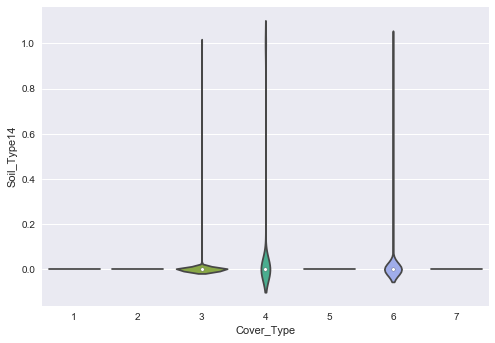

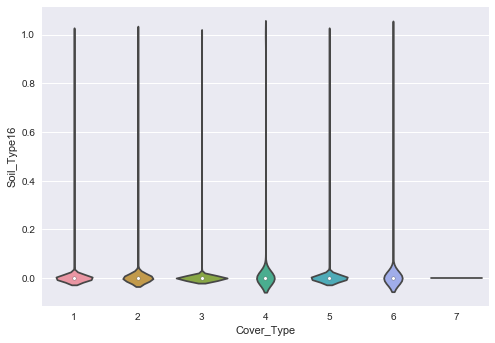

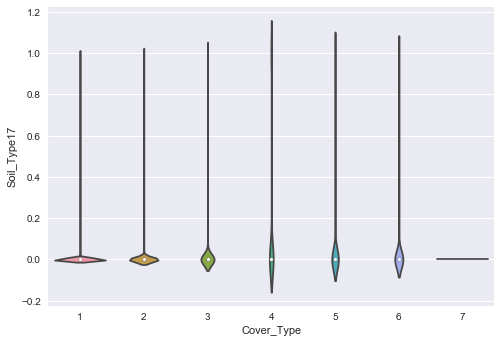

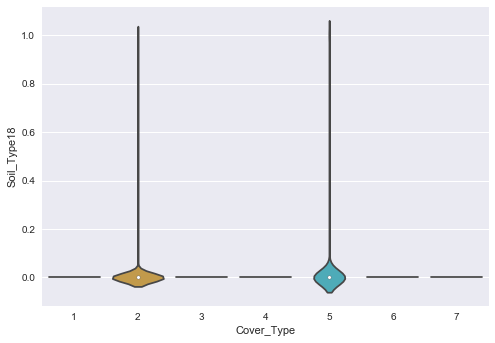

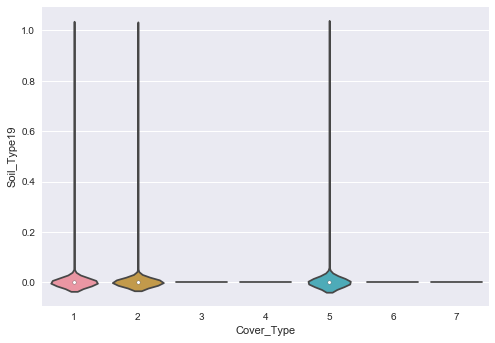

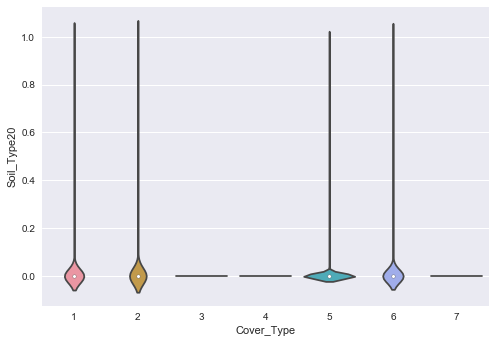

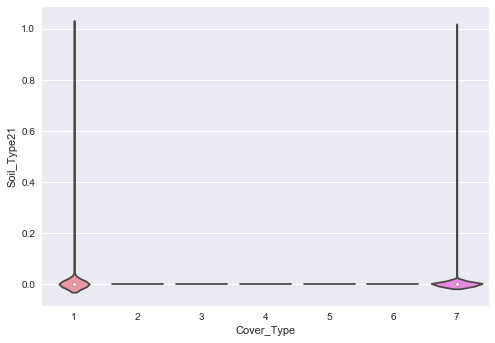

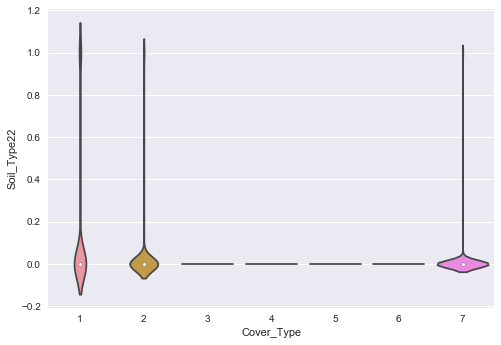

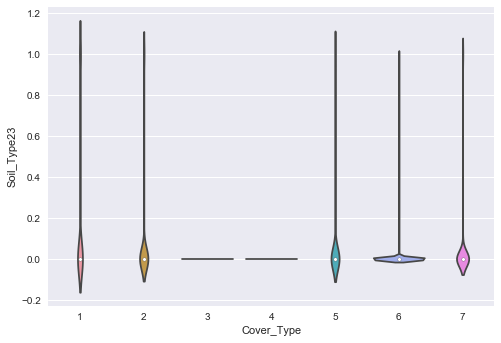

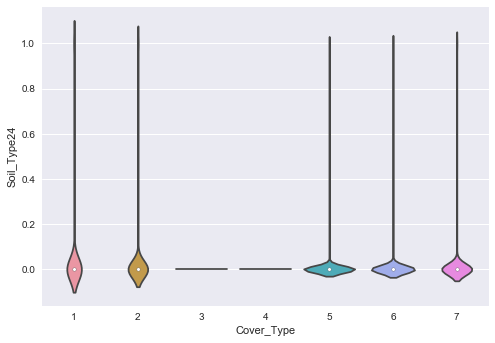

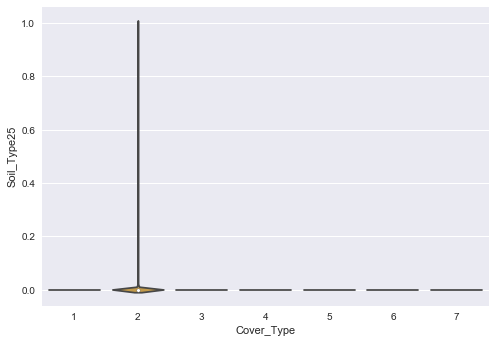

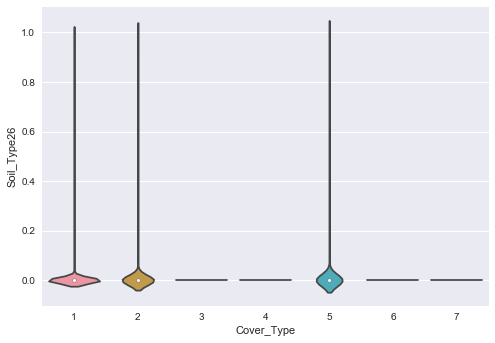

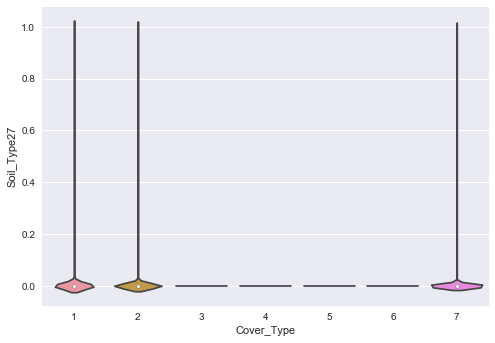

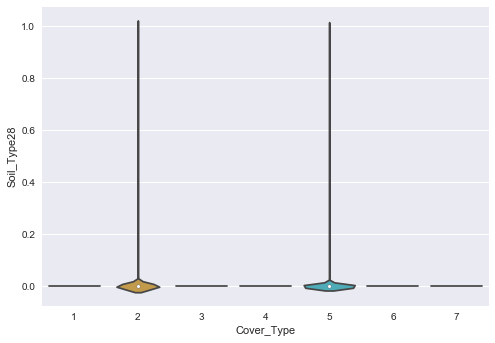

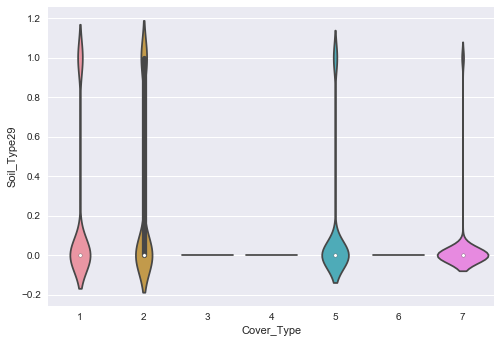

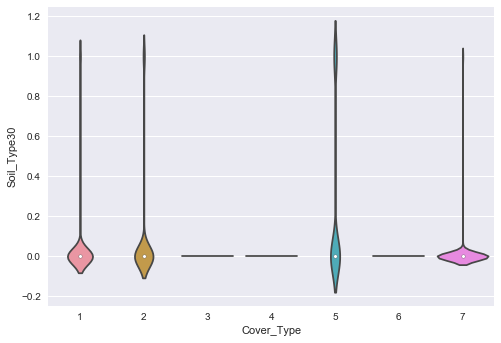

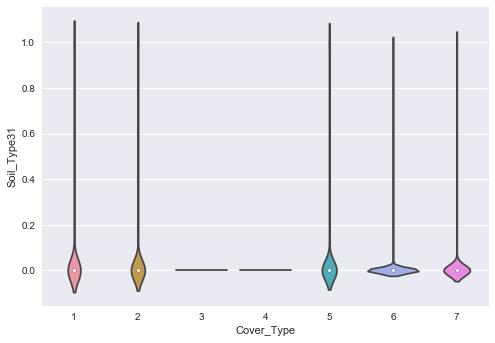

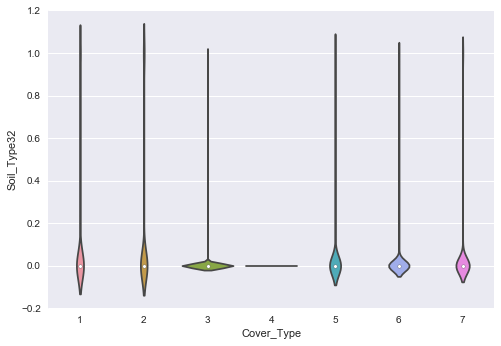

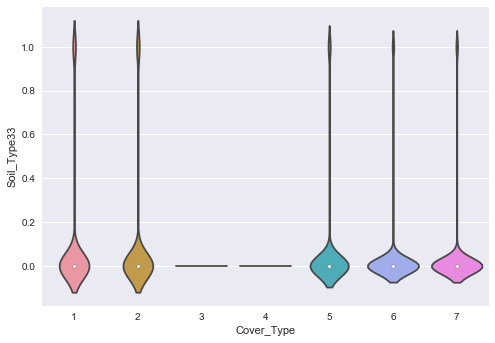

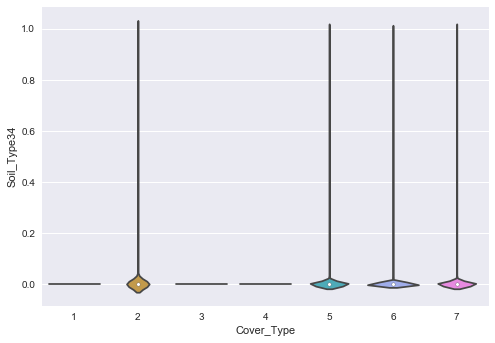

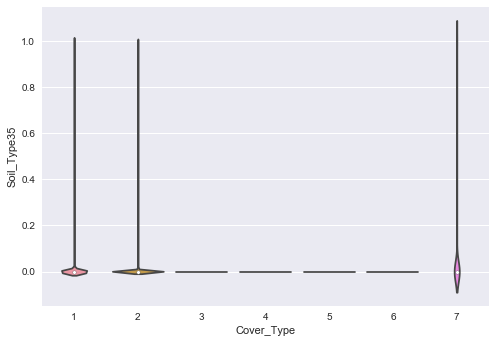

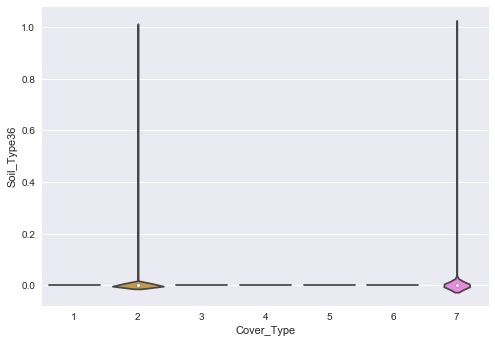

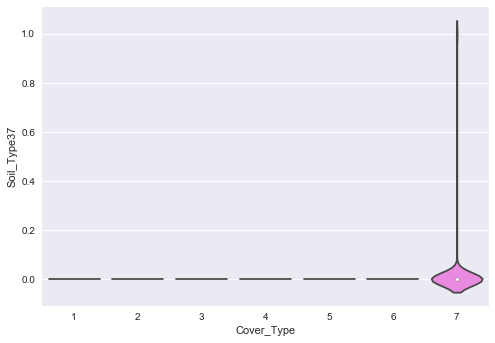

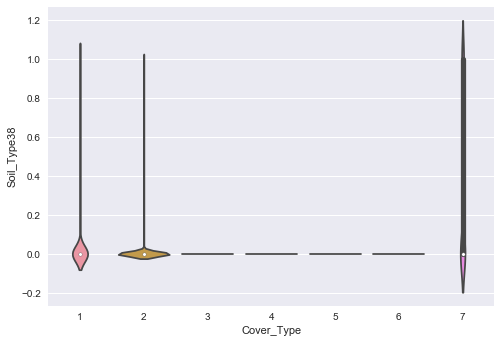

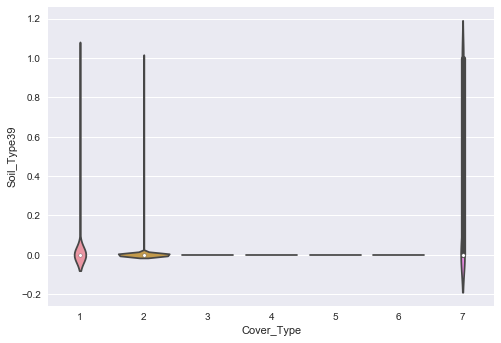

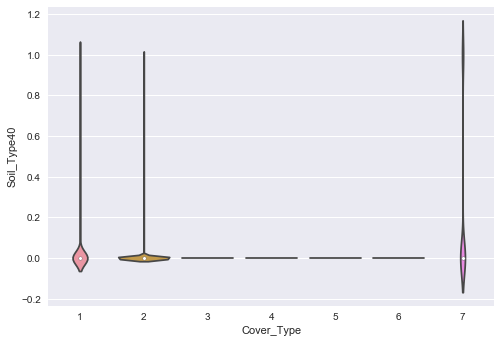

In [18]:
for i in range(0,size):
    sns.violinplot(data=dataset,x=x,y=y[i])  
    plt.show()

## Data Visualization

In [19]:
# Group one-hot encoded variables of a category into one single variable

#names of all the columns
cols = dataset.columns
#number of rows=r , number of columns=c
r,c = dataset.shape
#Create a new dataframe with r rows, one column for each encoded category, and target in the end
dataS = pd.DataFrame(index=np.arange(0, r),columns=['Wilderness_Area','Soil_Type','Cover_Type'])



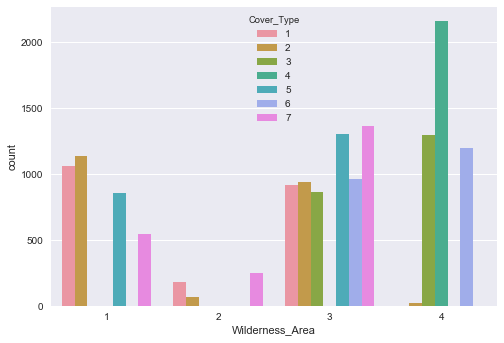

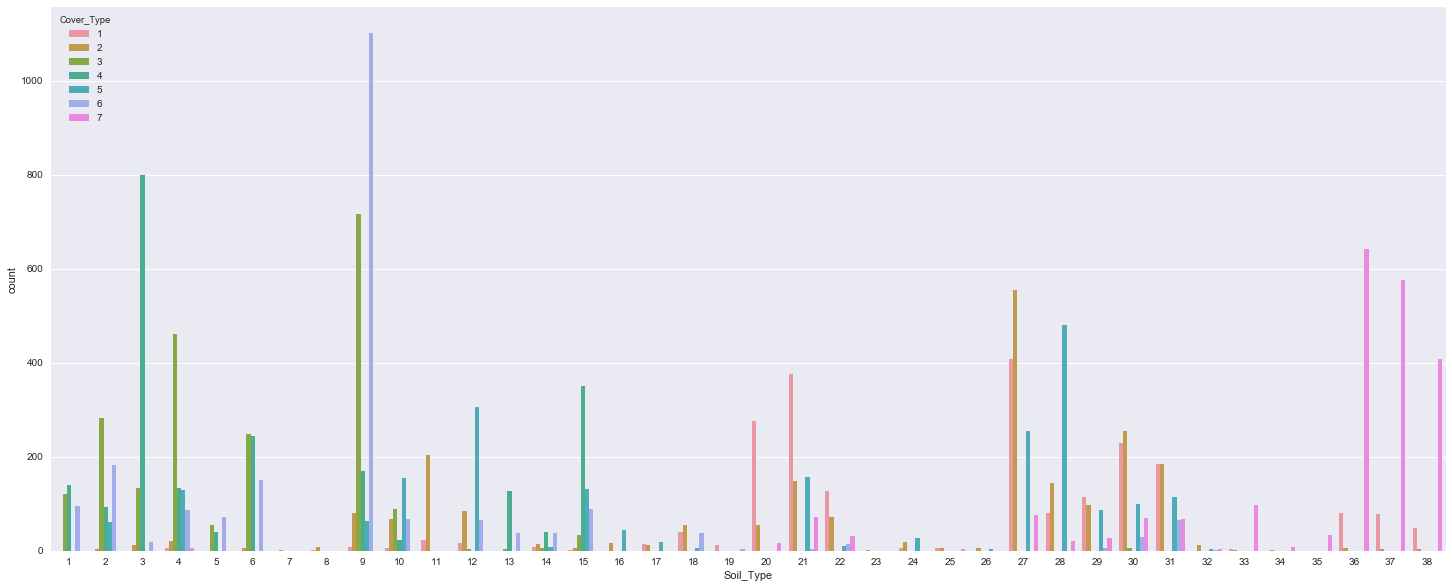

In [20]:
#Make an entry in 'data' for each r as category_id, target value
for i in range(0,r):
    w=0;
    s=0;
   # Category1 range
    for j in range(10,14):
        if (dataset.iloc[i,j] == 1):
            w=j-9  
            break
    # Category2 range    
    for k in range(14,54):
        if (dataset.iloc[i,k] == 1):
            s=k-13 
            break
     #Make an entry in 'data' for each r as category_id, target value         
    dataS.iloc[i]=[w,s,dataset.iloc[i,c-1]]
    
#Plot for Category1  
sns.countplot(x="Wilderness_Area", hue="Cover_Type", data=dataS)
plt.show()
#Plot for Category2
plt.rc("figure", figsize=(25, 10))
sns.countplot(x="Soil_Type", hue="Cover_Type", data=dataS)
plt.show()

#WildernessArea_4 has a lot of presence for cover_type 4. Good class distinction
#WildernessArea_3 has not much class distinction
#SoilType 1-6,10-14,17, 22-23, 29-33,35,38-40 offer lot of class distinction as counts for some are very high

## Data Preparation


Original

Delete rows or impute values in case of missing

StandardScaler

MinMaxScaler

Normalizer

In [22]:
#get the number of rows and columns
r, c = dataset.shape

#get the list of columns
cols = dataset.columns
#create an array which has indexes of columns
i_cols = []
for i in range(0,c-1):
    i_cols.append(i)
    
#array of importance rank of all features  
ranks = []

#Extract only the values
array = dataset.values

#Y is the target column, X has the rest
X = array[:,0:(c-1)]
Y =array[:,(c-1)]

#Validation chunk size
val_size = 0.1

#Use a common seed in all experiments so that same chunk is used for validation
seed = 0

#Split the data into chunks
from sklearn import cross_validation
X_train, X_val, Y_train, Y_val = cross_validation.train_test_split(X, Y, test_size=val_size, random_state=seed)

#Import libraries for data transformations
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

#All features
X_all = []
#Additionally we will make a list of subsets
X_all_add =[]

#columns to be dropped
rem = []
#indexes of columns to be dropped
i_rem = []

#List of combinations
comb = []
comb.append("All+1.0")

#Add this version of X to the list 
X_all.append(['Orig','All', X_train,X_val,1.0,cols[:c-1],rem,ranks,i_cols,i_rem])


#point where categorical data begins
size=10
#print(X_train.shape)
#Standardized
#Apply transform only for non-categorical data
X_temp = StandardScaler().fit_transform(X_train[:,0:size])
X_val_temp = StandardScaler().fit_transform(X_val[:,0:size])
#Concatenate non-categorical data and categorical
X_con = np.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = np.concatenate((X_val_temp,X_val[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['StdSca','All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])

#MinMax
#Apply transform only for non-categorical data
X_temp = MinMaxScaler().fit_transform(X_train[:,0:size])
X_val_temp = MinMaxScaler().fit_transform(X_val[:,0:size])
#Concatenate non-categorical data and categorical
X_con = np.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = np.concatenate((X_val_temp,X_val[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['MinMax', 'All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])

#Normalize
#Apply transform only for non-categorical data
X_temp = Normalizer().fit_transform(X_train[:,0:size])
X_val_temp = Normalizer().fit_transform(X_val[:,0:size])
#Concatenate non-categorical data and categorical
X_con = np.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = np.concatenate((X_val_temp,X_val[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['Norm', 'All', X_con,X_val_con,1.0,cols,rem,ranks,i_cols,i_rem])


#Impute
#Imputer is not used as no data is missing

#List of transformations
trans_list = []
X_orig = X

for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
    trans_list.append(trans)


## Feature Selection

In [23]:
#Select top 75%,50%,25%
ratio_list = [0.75,0.50,0.25]

Feature Selection =- SelectPercentile

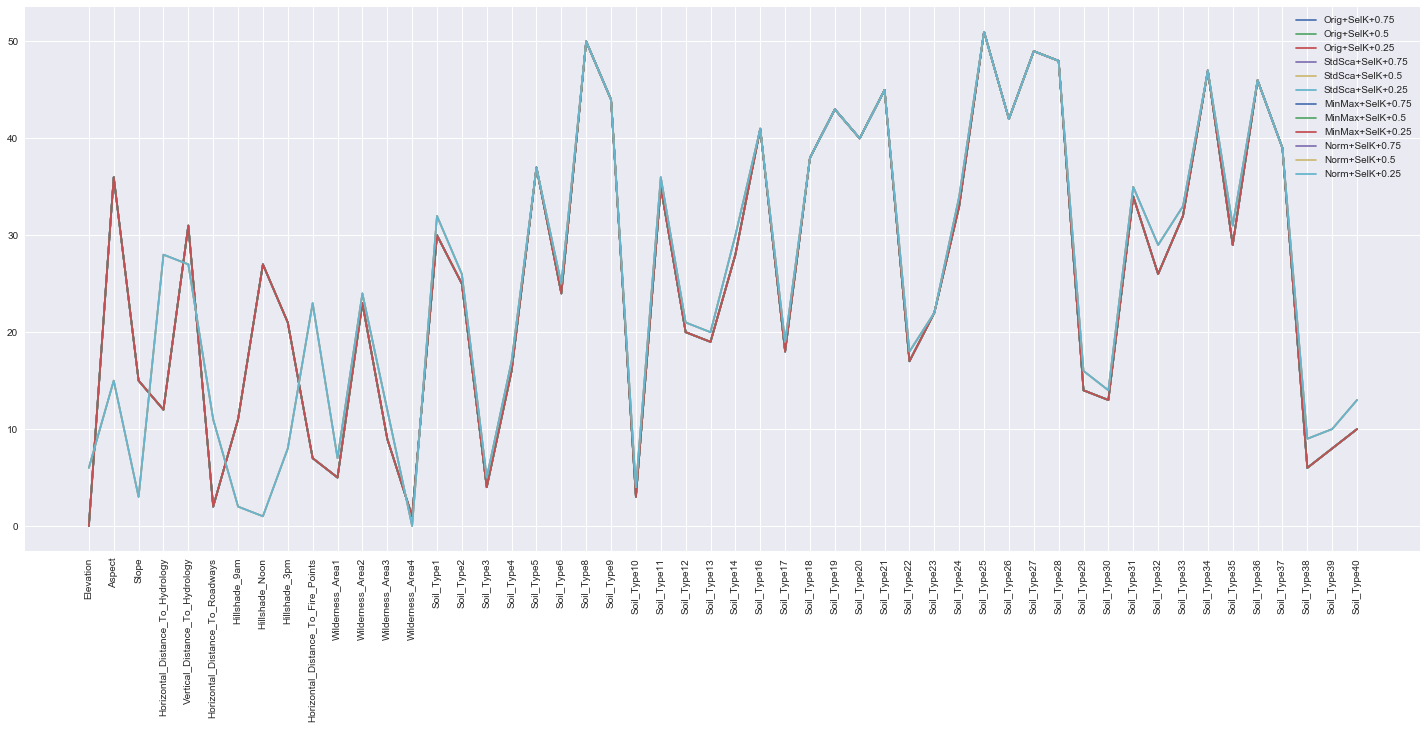

In [24]:
#List of feature selection models
feat = []

#List of names of feature selection models
feat_list =[]

#Libraries for SelectPercentile    
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif        

n = 'SelK'
feat_list.append(n)
for val in ratio_list:
    comb.append("%s+%s" % (n,val))
    feat.append([n,val,SelectPercentile(score_func=f_classif,percentile=val*100)])   


#For all transformations of X
for trans,s, X, X_val, d, cols, rem, ra, i_cols, i_rem in X_all:
    #For all feature selection models
    for name,v, model in feat:
        #Train the model against Y
        model.fit(X,Y_train)
        #Combine importance and index of the column in the array joined
        joined = []
        for i, pred in enumerate(list(model.scores_)):
            joined.append([i,cols[i],pred])
        #Sort in descending order    
        joined_sorted = sorted(joined, key=lambda x: -x[2])
        #Starting point of the columns to be dropped
        rem_start = int((v*(c-1)))
        #List of names of columns selected
        cols_list = []
        #Indexes of columns selected
        i_cols_list = []
        #Ranking of all the columns
        rank_list =[]
        #List of columns not selected
        rem_list = []
        #Indexes of columns not selected
        i_rem_list = []
        #Split the array. Store selected columns in cols_list and removed in rem_list
        for j, (i, col, x) in enumerate(list(joined_sorted)):
            #Store the rank
            rank_list.append([i,j])
            #Store selected columns in cols_list and indexes in i_cols_list
            if(j < rem_start):
                cols_list.append(col)
                i_cols_list.append(i)
            #Store not selected columns in rem_list and indexes in i_rem_list    
            else:
                rem_list.append(col)
                i_rem_list.append(i)    
        #Sort the rank_list and store only the ranks. Drop the index 
        #Append model name, array, columns selected and columns to be removed to the additional list        
        X_all_add.append([trans,name,X,X_val,v,cols_list,rem_list,[x[1] for x in sorted(rank_list,key=lambda x:x[0])],i_cols_list,i_rem_list])    


#Set figure size
plt.rc("figure", figsize=(25, 10))

#Plot a graph for different feature selectors        
for f_name in feat_list:
    #Array to store the list of combinations
    leg=[]
    fig, ax = plt.subplots()
    #Plot each combination
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        if(name==f_name):
            plt.plot(rank_list)
            leg.append(trans+"+"+name+"+%s"% v)
    #Set the tick names to names of columns
    ax.set_xticks(range(c-1))
    ax.set_xticklabels(cols[:c-1],rotation='vertical')
    #Display the plot
    plt.legend(leg,loc='best')    
    #Plot the rankings of all the features for all combinations
    plt.show()

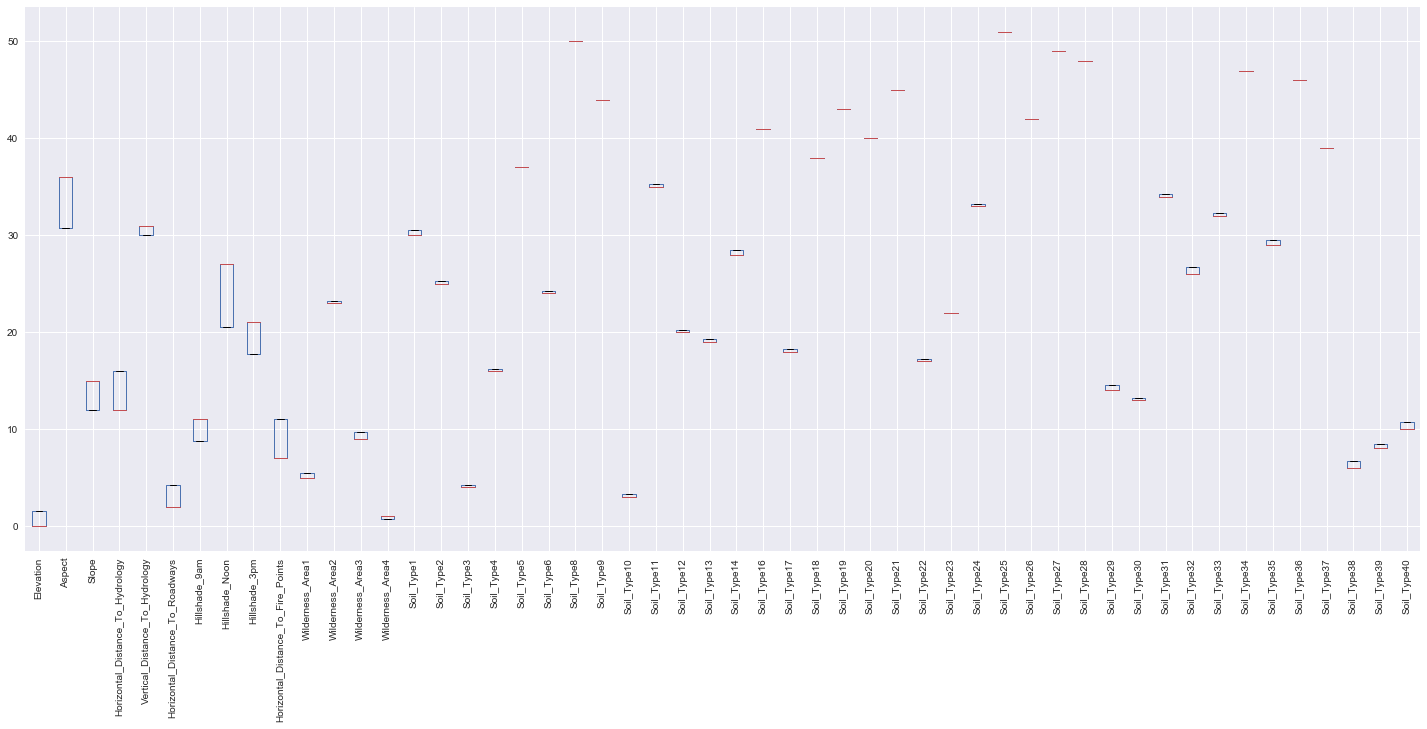

In [25]:
rank_df = pd.DataFrame(data=[x[7] for x in X_all_add],columns=cols[:c-1])
_ = rank_df.boxplot(rot=90)
#Below plot summarizes the rankings according to the standard feature selection techniques
#Top ranked attributes are ... first 10 attributes, Wilderness_Area1,4 ...Soil_Type 3,4,10,38-40

### Rank Features based on Median

In [26]:
rank_df = pd.DataFrame(data=[x[7] for x in X_all_add],columns=cols[:c-1])
med = rank_df.median()
print(med)

Elevation                              0.0
Aspect                                36.0
Slope                                 15.0
Horizontal_Distance_To_Hydrology      12.0
Vertical_Distance_To_Hydrology        31.0
Horizontal_Distance_To_Roadways        2.0
Hillshade_9am                         11.0
Hillshade_Noon                        27.0
Hillshade_3pm                         21.0
Horizontal_Distance_To_Fire_Points     7.0
Wilderness_Area1                       5.0
Wilderness_Area2                      23.0
Wilderness_Area3                       9.0
Wilderness_Area4                       1.0
Soil_Type1                            30.0
Soil_Type2                            25.0
Soil_Type3                             4.0
Soil_Type4                            16.0
Soil_Type5                            37.0
Soil_Type6                            24.0
Soil_Type8                            50.0
Soil_Type9                            44.0
Soil_Type10                            3.0
Soil_Type11

In [27]:
#Select top 75%,50%,25%
ratio_list = [0.75,0.50,0.25]

#Median of rankings for each column
unsorted_rank = [0,36,15,12,31,2,11,27,21,7,5,23,9,1,30,25,4,16,37,24,50,44,3,35,20,19,28,41,18,38,43,40,45,17,22,33,51,42,49,48,14,13,34,26,32,47,29,46,39,6,8,10]

#List of feature selection models
feat = []

#Add Median to the list 
n = 'Median'
for val in ratio_list:
    feat.append([n,val])   

for trans,s, X, X_val, d, cols, rem_cols, ra, i_cols, i_rem in X_all:
    #Create subsets of feature list based on ranking and ratio_list
    for name, v in feat:
        #Combine importance and index of the column in the array joined
        joined = []
        for i, pred in enumerate(unsorted_rank):
            joined.append([i,cols[i],pred])
        #Sort in descending order    
        joined_sorted = sorted(joined, key=lambda x: x[2])
        #Starting point of the columns to be dropped
        rem_start = int((v*(c-1)))
        #List of names of columns selected
        cols_list = []
        #Indexes of columns selected
        i_cols_list = []
        #Ranking of all the columns
        rank_list =[]
        #List of columns not selected
        rem_list = []
        #Indexes of columns not selected
        i_rem_list = []
        #Split the array. Store selected columns in cols_list and removed in rem_list
        for j, (i, col, x) in enumerate(list(joined_sorted)):
            #Store the rank
            rank_list.append([i,j])
            #Store selected columns in cols_list and indexes in i_cols_list
            if(j < rem_start):
                cols_list.append(col)
                i_cols_list.append(i)
            #Store not selected columns in rem_list and indexes in i_rem_list    
            else:
                rem_list.append(col)
                i_rem_list.append(i)    
        #Sort the rank_list and store only the ranks. Drop the index 
        #Append model name, array, columns selected and columns to be removed to the additional list        
        X_all_add.append([trans,name,X,X_val,v,cols_list,rem_list,[x[1] for x in sorted(rank_list,key=lambda x:x[0])],i_cols_list,i_rem_list])

In [28]:
#Import plotting library    
import matplotlib.pyplot as plt    

#Dictionary to store the accuracies for all combinations 
acc = {}

#List of combinations
comb = []

#Append name of transformation to trans_list
for trans in trans_list:
    acc[trans]=[]

In [30]:
print(acc)

{'Orig': [], 'StdSca': [], 'MinMax': [], 'Norm': []}


## ML Algorithms

KNN (Non-linear algo)

In [43]:
#Evaluation of various combinations of KNN Classifier using all the views

#Import the library
from sklearn.neighbors import KNeighborsClassifier

n_list = [1]

for n_neighbors in n_list:
    #Set the base model
    model = KNeighborsClassifier(n_jobs=-1,n_neighbors=n_neighbors)
   
    algo = "KNN"

    ##Set figure size
    #plt.rc("figure", figsize=(25, 10))

    #Accuracy of the model using all features
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    comb.append("%s with n=%s+%s of %s" % (algo,n_neighbors,"All",1.0))

    #Accuracy of the model using a subset of features    
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    for v in ratio_list:
        comb.append("%s with n=%s+%s of %s" % (algo,n_neighbors,"Subset",v))
        
#print(acc)        
    
##Plot the accuracies of all combinations
#fig, ax = plt.subplots()
##Plot each transformation
#for trans in trans_list:
#        plt.plot(acc[trans])
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Display the plot
#plt.legend(trans_list,loc='best')    
##Plot the accuracy for all combinations
#plt.show()    
 
#Best estimated performance is close to 86% when n_neighbors=1 and normalizer is used

LR (Linear algo)

In [44]:
#Evaluation of various combinations of LogisticRegression using all the views

#Import the library
from sklearn.linear_model import LogisticRegression

C_list = [100]

for C in C_list:
    #Set the base model
    model = LogisticRegression(n_jobs=-1,random_state=seed,C=C)
   
    algo = "LR"

    ##Set figure size
    #plt.rc("figure", figsize=(25, 10))

    #Accuracy of the model using all features
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    comb.append("%s with C=%s+%s of %s" % (algo,C,"All",1.0))

    #Accuracy of the model using a subset of features    
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    for v in ratio_list:
        comb.append("%s with C=%s+%s of %s" % (algo,C,"Subset",v))
    
##Plot the accuracies of all combinations
#fig, ax = plt.subplots()
##Plot each transformation
#for trans in trans_list:
#        plt.plot(acc[trans])
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Display the plot
#plt.legend(trans_list,loc='best')    
##Plot the accuracy for all combinations
#plt.show()    
      
#Best estimated performance is close to 67% with LR when C=100 and all attributes are considered and with standardized data
#Performance improves will increasing value of C
#Performance of Normalizer and MinMax Scaler is poor in general

Naive Bayes

In [45]:
#Evaluation of various combinations of Naive Bayes using all the views

#Import the library
from sklearn.naive_bayes import GaussianNB

#Set the base model
model = GaussianNB()
algo = "NB"

##Set figure size
#plt.rc("figure", figsize=(25, 10))

#Accuracy of the model using all features
for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
    model.fit(X[:,i_cols_list],Y_train)
    result = model.score(X_val[:,i_cols_list], Y_val)
    acc[trans].append(result)
    #print(trans+"+"+name+"+%d" % (v*(c-1)))
    #print(result)
comb.append("%s+%s of %s" % (algo,"All",1.0))
        
#Accuracy of the model using a subset of features    
for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
    model.fit(X[:,i_cols_list],Y_train)
    result = model.score(X_val[:,i_cols_list], Y_val)
    acc[trans].append(result)
    #print(trans+"+"+name+"+%d" % (v*(c-1)))
    #print(result)
for v in ratio_list:
    comb.append("%s+%s of %s" % (algo,"Subset",v))
    
##Plot the accuracies of all combinations
#fig, ax = plt.subplots()
##Plot each transformation
#for trans in trans_list:
#        plt.plot(acc[trans])
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Display the plot
#plt.legend(trans_list,loc='best')    
##Plot the accuracy for all combinations
#plt.show()    

#Best estimated performance is close to 64%. Original with 50% subset outperfoms all transformations of NB

Random Forest (Bagging)

In [31]:
#Evaluation of various combinations of Random Forest using all the views

#Import the library
from sklearn.ensemble import RandomForestClassifier

n_list = [100]

for n_estimators in n_list:
    #Set the base model
    model = RandomForestClassifier(n_jobs=-1,n_estimators=n_estimators, random_state=seed)
   
    algo = "RF"

    #Set figure size
    plt.rc("figure", figsize=(20, 10))

    #Accuracy of the model using all features
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    comb.append("%s with n=%s+%s of %s" % (algo,n_estimators,"All",1.0))

    #Accuracy of the model using a subset of features    
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    for v in ratio_list:
        comb.append("%s with n=%s+%s of %s" % (algo,n_estimators,"Subset",v))
    
##Plot the accuracies of all combinations
#fig, ax = plt.subplots()
##Plot each transformation
#for trans in trans_list:
#        plt.plot(acc[trans])
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Display the plot
#plt.legend(trans_list,loc='best')    
##Plot the accuracy for all combinations
#plt.show()    

#Best estimated performance is close to 85% when n_estimators is 100

Extra Trees (Bagging)

In [32]:
#Evaluation of various combinations of Extra Trees using all the views

#Import the library
from sklearn.ensemble import ExtraTreesClassifier

n_list = [100]

for n_estimators in n_list:
    #Set the base model
    model = ExtraTreesClassifier(n_jobs=-1,n_estimators=n_estimators, random_state=seed)
   
    algo = "ET"

    #Set figure size
    plt.rc("figure", figsize=(20, 10))

    #Accuracy of the model using all features
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    comb.append("%s with n=%s+%s of %s" % (algo,n_estimators,"All",1.0))

    #Accuracy of the model using a subset of features    
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    for v in ratio_list:
        comb.append("%s with n=%s+%s of %s" % (algo,n_estimators,"Subset",v))
    
##Plot the accuracies of all combinations
#fig, ax = plt.subplots()
##Plot each transformation
#for trans in trans_list:
#        plt.plot(acc[trans])
##Set the tick names to names of combinations
#ax.set_xticks(range(len(comb)))
#ax.set_xticklabels(comb,rotation='vertical')
##Display the plot
#plt.legend(trans_list,loc='best')    
##Plot the accuracy for all combinations
#plt.show()    

#Best estimated performance is close to 88% when n_estimators is 100 , StdScaler with 0.75

---

## Make Predictions

In [57]:
# Make predictions using Extra Tress Classifier + 0.5 subset as it gave the best estimated performance

n_estimators = 100


#Obtain the list of indexes for the required model
indexes = []
for trans,name,X_orig,X_val,v,rank_list,i_cols_list,i_rem_list in X_all_dd:
    if v == 0.5:
        if trans == 'Orig':
            indexes = i_cols_list
X_orig.shape


(13608, 52)

In [ ]:
#print(Y.shape)
#Best model definition
best_model = ExtraTreesClassifier(n_jobs=-1,n_estimators=n_estimators)
best_model.fit(X_orig[:,indexes],Y)

#Read test dataset
dataset_test = pd.read_csv("test.csv")
#Drop unnecessary columns
ID = dataset_test['Id']
dataset_test.drop('Id',axis=1,inplace=True)
dataset_test.drop(rem,axis=1,inplace=True)
X_test = dataset_test.values

#Make predictions using the best model
predictions = best_model.predict(X_test[:,indexes])
# Write submissions to output file in the correct format
with open("submission.csv", "w") as subfile:
    subfile.write("Id,Cover_Type\n")
    for i, pred in enumerate(list(predictions)):
        subfile.write("%s,%s\n"%(ID[i],pred))

## Algorithms we plan to use :
- KNN
- Random Forest Classifier
- SVM 
- Bagging/Boosting
- Naive Bayes, Linear Regression

---

## Conclusion :
- Hillshade patterns give a nice ellipsoid patterns with each other. 
- Aspect and Hillshades attributes form a sigmoid pattern.
- Horizontal and vertical distance to hydrology give an almost linear pattern. 
- Elevation is highly correlated with the target and hence an important attribute. 
- Aspect contains a couple of normal distribution for several classes. 
- Horizontal distance to road and hydrology have similar distribution.